In [82]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from callback import VanillaCallback
from torchvision import transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

In [83]:
import zipfile
import os

with zipfile.ZipFile("/content/drive/MyDrive/data.zip", 'r') as zip_ref:
    zip_ref.extractall("data")



In [84]:
print("Kelas:", train_set.class_to_idx)
num_classes = len(train_set.classes)
print("Jumlah kelas:", num_classes)


Kelas: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Jumlah kelas: 4


# Dataset dan Dataloder

In [85]:
bs = 64
crop_size = 64

train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(crop_size, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(70),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
])
# Dataset dan DataLoader
train_set = datasets.ImageFolder("data/Training/", transform=train_transform)
trainloader = DataLoader(
    train_set, batch_size=bs, shuffle=True, num_workers=0, pin_memory=False
)

test_set = datasets.ImageFolder("data/Testing/", transform=test_transform)
testloader = DataLoader(
    test_set, batch_size=bs, shuffle=False, num_workers=0, pin_memory=False
)


# Arsitektur

In [86]:

class CNN(nn.Module):
    def __init__(self, num_classes=2, dropout=0.1):
        super().__init__()

        # Feature extractor
        self.conv = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Flatten()
        )

        self.fc = nn.Sequential(
            nn.Linear(64 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(256, num_classes),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x


# Training prepration

In [87]:
model = CNN(num_classes=4).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = VanillaCallback(model, outdir="model")

# Training

In [88]:
from tqdm.auto import  tqdm
def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()

    cost = correct = 0
    for feature, target in tqdm (dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)

        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()

    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 1: Train acc: 0.7187 | Val acc: 0.7208


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 2: Train acc: 0.8134 | Val acc: 0.7445


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 3: Train acc: 0.8409 | Val acc: 0.6659


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 4: Train acc: 0.8789 | Val acc: 0.8490


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 5: Train acc: 0.8860 | Val acc: 0.7925


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 6: Train acc: 0.8969 | Val acc: 0.7735


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 7: Train acc: 0.9000 | Val acc: 0.7948


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 8: Train acc: 0.9147 | Val acc: 0.9115


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 9: Train acc: 0.9181 | Val acc: 0.8673


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 10: Train acc: 0.9328 | Val acc: 0.8047


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 11: Train acc: 0.9224 | Val acc: 0.9047


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 12: Train acc: 0.9310 | Val acc: 0.8543


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 13: Train acc: 0.9326 | Val acc: 0.9252


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 14: Train acc: 0.9468 | Val acc: 0.8528


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 15: Train acc: 0.9433 | Val acc: 0.9451


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 16: Train acc: 0.9457 | Val acc: 0.9252


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 17: Train acc: 0.9482 | Val acc: 0.8818


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 18: Train acc: 0.9536 | Val acc: 0.9420


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 19: Train acc: 0.9496 | Val acc: 0.9352


Train:   0%|          | 0/90 [00:00<?, ?it/s]

Test:   0%|          | 0/21 [00:00<?, ?it/s]

Epoch 20: Train acc: 0.9515 | Val acc: 0.9268
Early stopping triggered!


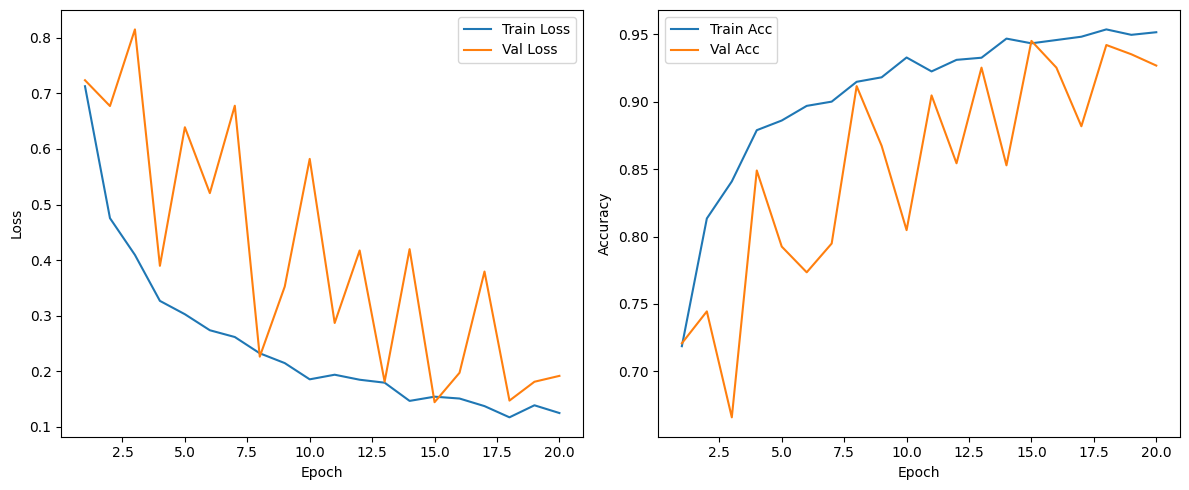

In [89]:
for epoch in range(100):
    train_loss, train_acc = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        val_loss, val_acc = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)

    callback.log(train_loss, val_loss, train_acc, val_acc)
    callback.check_early_stop(val_acc)

    print(f"Epoch {epoch+1}: Train acc: {train_acc:.4f} | Val acc: {val_acc:.4f}")

    if callback.early_stop:
        print("Early stopping triggered!")
        break

callback.plot()


In [99]:
feature, target = next(iter(testloader))
faeture, target = feature.to(device), target.to(device)

In [101]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
print(preds.tolist())


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


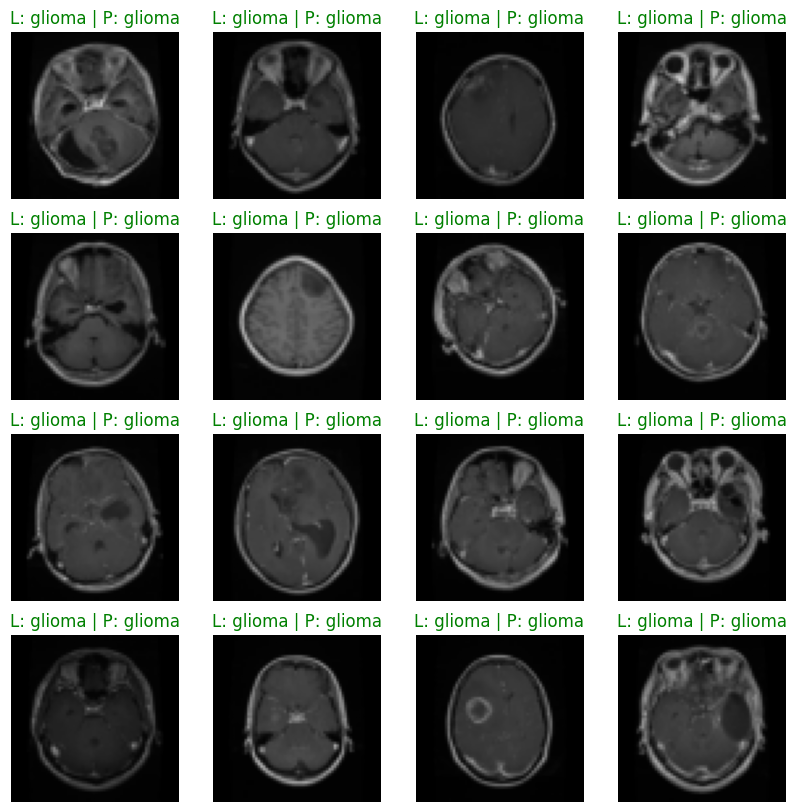

In [108]:
label2cat = train_set.classes


fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for image, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(image.permute(1, 2, 0).cpu())


    font = {"color": 'r'} if label != pred else {"color": 'g'}


    label_str = label2cat[label.item()]
    pred_str = label2cat[pred.item()]

    ax.set_title(f"L: {label_str} | P: {pred_str}", fontdict=font)
    ax.axis('off')
